# Red neuronal desde Cero

In [1]:
%config IPCompleter.greedy=True

In [2]:
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#paquetes para el analisis
import os                             
import skimage.io as im               #leer imagenes
import random
import sklearn.model_selection as skl #train_test_split()
from skimage import transform         #reescalado
from skimage.color import rgb2gray    #escala de grises

## Cargar datos

In [4]:
#Directorio de trabajo
path = 'C:/Users/jvill/Documents/ESCUELA/Machine Learning/Datasets/Hongos-desde cero'

In [5]:
def cargar_datos(path):
    dirs = [d for d in os.listdir(path)
     if os.path.isdir(os.path.join(path,d))]

    labels = [] ; 
    images = []    

    for d in dirs:
        label_dir = os.path.join(path,d)
        file_names = [os.path.join(label_dir,f) 
                          for f in os.listdir(label_dir)]        
        for f in file_names:
            images.append(im.imread(f))    #Lee imagen 
            labels.append(d) #¿A qué carpeta pertenece la imagen?
            
    return images, labels

In [6]:
imagenes, etiquetas = cargar_datos(path)

In [7]:
#Numero de imagenes en el conjunto
num_img = len(imagenes)
num_eti = len(etiquetas)
if num_img==num_eti: print(num_img)

115


## Explorar imagenes

In [8]:
#Dimensiones de la primera imagen
first_shape = imagenes[0].shape
print(first_shape)

(1040, 1388, 3)


In [9]:
#Corroborar misma dimension en todas las imagenes
for i in range(num_img):
    if imagenes[i].shape != first_shape:
        print('imagen', i,'diferente')  #Si hay alguna imagen de dimensiones diferentes, lo indicará

In [10]:
especies = set(etiquetas)
especies

{'Chrysosporium', 'Microsporum canis'}

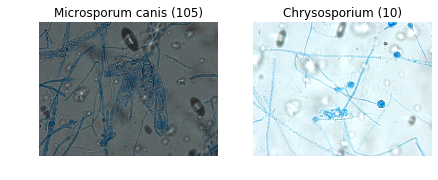

In [11]:
#Visualizar fotos de especies
plt.figure(figsize=(30,30))
i=1
for especie in especies:
    img_temp = imagenes[etiquetas.index(especie)] #index arroja sólo el primer indice que contiene 'especie'
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title(especie+' ('+str(etiquetas.count(especie))+')')    
    i+=1
    plt.imshow(img_temp)
    
plt.show()
    

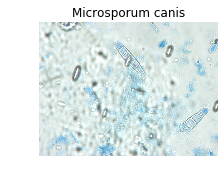

In [12]:
plt.figure(figsize=(30,30))
img_temp = imagenes[-24] #index arroja sólo el primer indice que contiene 'especie'
plt.subplot(8,8,i)
plt.axis("off")
plt.title(etiquetas[-24])    
plt.imshow(img_temp)
plt.show()

## Reescalado

In [13]:
imagenes[0].shape #Dimension de las imagenes

(1040, 1388, 3)

In [14]:
imagenes = [transform.resize(imagen,(104,139)) for imagen in imagenes] #transformacion

C:\Users\jvill\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\Users\jvill\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [15]:
imagenes[0].shape #Nueva dimension de las imagenes

(104, 139, 3)

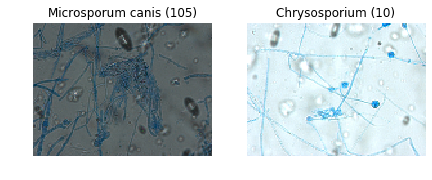

In [16]:
#Visualizar fotos de especies
plt.figure(figsize=(30,30))
i=1
for especie in especies:
    img_temp = imagenes[etiquetas.index(especie)] #index arroja sólo el primer indice que contiene 'especie'
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title(especie+' ('+str(etiquetas.count(especie))+')')    
    i+=1
    plt.imshow(img_temp)
    
plt.show()
    

## Colores a grises

In [17]:
imagenes[0]  #imagen en rgb

array([[[0.87939766, 0.93330512, 0.96859924],
        [0.87834673, 0.92557483, 0.96649739],
        [0.9       , 0.96771759, 0.99909014],
        ...,
        [0.8710749 , 0.93382   , 0.98480039],
        [0.9324799 , 0.99232614, 0.98729722],
        [0.87539145, 0.89107773, 0.92637184]],

       [[0.86953731, 0.92742277, 0.96072789],
        [0.88550571, 0.93256454, 0.97962336],
        [0.84208633, 0.9300395 , 0.96218084],
        ...,
        [0.92338835, 0.982494  , 1.        ],
        [0.87357173, 0.9294964 , 0.96666667],
        [0.8549866 , 0.93341797, 0.96672309]],

       [[0.87939766, 0.93037805, 0.97547609],
        [0.88712794, 0.93819298, 0.97630131],
        [0.8619763 , 0.95007053, 0.99621949],
        ...,
        [0.89621949, 0.9707293 , 0.99818028],
        [0.90204542, 0.95302581, 0.97655523],
        [0.87945408, 0.93336155, 0.96766117]],

       ...,

       [[0.87249259, 0.91955142, 0.96661024],
        [0.8774933 , 0.94134575, 0.98456764],
        [0.88340387, 0

In [18]:
imagenes = np.array(imagenes)  #Convierto la lista a arreglo
imagenes = rgb2gray(imagenes)  #Convierto las imagenes a escala de grises

In [19]:
imagenes[0] #imagen en grises

array([[0.92439449, 0.91848938, 0.95558956, ..., 0.92416236, 0.97924623,
        0.8902891 ],
       [0.91752341, 0.92595748, 0.91366684, ..., 0.97119624, 0.92029239,
        0.9191526 ],
       [0.92279629, 0.93008927, 0.93467785, ..., 0.95687518, 0.94388895,
        0.92437921],
       ...,
       [0.91294436, 0.9308934 , 0.93335175, ..., 0.93971416, 0.94298853,
        0.93627117],
       [0.91545988, 0.94963059, 0.92906977, ..., 0.9300172 , 0.92067112,
        0.92630066],
       [0.91822978, 0.90094813, 0.92921456, ..., 0.91563955, 0.92525771,
        0.92906952]])

In [20]:
imagenes[0].shape 

(104, 139)

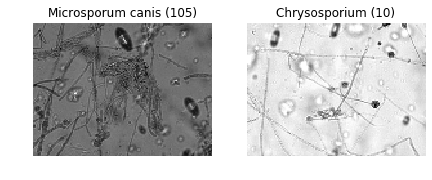

In [21]:
#Visualizar fotos de especies
plt.figure(figsize=(30,30))
i=1
for especie in especies:
    img_temp = imagenes[etiquetas.index(especie)] #index arroja sólo el primer indice que contiene 'especie'
    plt.subplot(8,8,i)
    plt.axis("off")
    plt.title(especie+' ('+str(etiquetas.count(especie))+')')    
    i+=1
    plt.imshow(img_temp, cmap = 'gray')
    
plt.show()
    

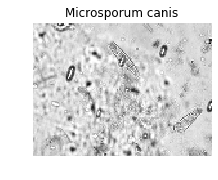

In [22]:
plt.figure(figsize=(30,30))
img_temp = imagenes[-24]
plt.subplot(8,8,i)
plt.axis("off")
plt.title(etiquetas[-24])    
plt.imshow(img_temp, cmap = 'gray')
plt.show()    

## Crear dataset

In [84]:
#CREAR EL DATASET
n = imagenes.shape[0]  #num de individuos
p = imagenes.shape[1]*imagenes.shape[2]    #num de features


In [85]:
X =np.empty([imagenes.shape[0],imagenes.shape[1]*imagenes.shape[2]])
contador = 0
for i in imagenes:
    X[contador] = np.ravel(i)
    contador+=1

In [86]:
#Funcion para asignar a cada especie un numero
def asignar_numero(x):
    return {
        'Chrysosporium': 1,
        'Microsporum canis': 0,
        'Trichophyton mentagrophytes': 2,
        'Trichophyton rubrum': 3,
        'Trichophyton tonsurans': 4,
    }[x]

In [87]:
#Lista de etiquetas para usar en el modelo
Y = np.empty([len(etiquetas),1])
contador=0
for eti in etiquetas:
    Y[contador] = (asignar_numero(eti))
    contador+=1

In [88]:
#CLASE: CAPA DE LA RED

class capa():
    
    def __init__(self, num_conec, num_neuro, f_act): 
        
        self.f_act = f_act
        self.b = np.random.rand(1,num_neuro)     *2 - 1
        self.w = np.random.rand(num_conec,num_neuro)*2 - 1
        self.num_conec = num_conec
        self.num_neuro = num_neuro

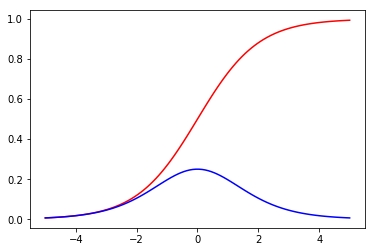

In [89]:
#FUNCIONES DE ACTIVACION
 
sigmoide = (lambda x: 1/(1+np.e**(-x)),
            lambda x: np.e**(-x) /(1+np.e**(-x))**2)

_x = np.linspace(-5,5,100)
plt.plot(_x,sigmoide[0](_x),c="red")
plt.plot(_x,sigmoide[1](_x),c="blue")

In [90]:
# CREAR ESQUELETO DE LA RED

#capa(num_conec,num_neuro,f_act)

capa1 = capa(p,4,sigmoide)
capa2 = capa(4,8,sigmoide)
#...

#Para automatizar la creacion de todas las capas, en vez de hacerlas una por una:

def crear_red(topo_red,f_act):
    red = []
    for i, num_neuro in enumerate(topo_red[:-1]):
        red.append(capa(topo_red[i],topo_red[i+1],f_act))
    
    return red

In [91]:
# FUNCION DE COSTO
f_costo = (lambda Yp,Yr: np.mean((Yp-Yr)**2),  #Establezco una funcion de costo para la red
           lambda Yp,Yr: (Yp-Yr) )

In [93]:
# PROCESO DE ENTRENAMIENTO DE LA RED

def entrenar(red_neuronal,X,Y,f_costo, lr=0.5,train=True):
    
    out = [(None,X)] #lista de parejas(z,a) para cada capa
    
    #FORWARD PASS
    for l, layer in enumerate(red_neuronal):
        
        z = out[-1][1] @ red_neuronal[l].w + red_neuronal[l].b #me devuelve una matriz de n x num_neuro(z's) = 
                                                               #valor de las z's para cada individuo(500)
        a = red_neuronal[l].f_act[0](z) #aplico funcion de activacion a la matriz z anterior
        
        out.append((z,a))
        
    #print(out[-1][1]) #me imprime el valor obtenido al final de la red f(z) para cada individuo (X)
    #print(f_costo[0](out[-1][1],Y)) #me imprime el valor de la funcion de costo terminando de recorrer la red
                                    #ECM de los valores obtenidos al final de la red y 
    #BACKWARD PASS
    if train :
        deltas = []
        for l in reversed(range(0,len(red_neuronal))):
            z = out[l+1][0]
            a = out[l+1][1]
            
            if  l == len(red_neuronal)-1:
                deltas.insert(0,f_costo[1](a,Y)*red_neuronal[l].f_act[1](z))#inserta en la primera posicion un vector de 500x1
            
            else:
                deltas.insert(0,deltas[0] @ _W.T * red_neuronal[l].f_act[1](z))
             
        #GRADIENT DECENT        
            _W = red_neuronal[l].w
            
            red_neuronal[l].b = red_neuronal[l].b - np.mean(deltas[0],axis=0,keepdims=True) * lr
            red_neuronal[l].w = red_neuronal[l].w - out[l][1].T @ deltas[0] * lr
            
             
    return out[-1][1]  #Prediccion final de la red  para los n individuos

In [98]:
#Entreno red y muestro gráficamente el avance de la clasificacion
import time
from IPython.display import clear_output

topology = [p,3,2,1]  #num de neuronas que quiero en cada capa de mi red
mi_red = crear_red(topology,sigmoide)     #Creo red

loss = []

for i in range(301):   #Cuantas veces quiero entrenar mi red
    
    yp = entrenar(mi_red,X,Y,f_costo,lr=0.05) 
    
    if i % 50 == 0:
        loss.append(f_costo[0](yp,Y))
        print("Epoch",i)
        print("ECM =",f_costo[0](yp,Y))
        resultado = np.where(yp<0.5,1,0)
        aciertos = (resultado == Y).ravel().tolist().count(True) #Aciertos
        acc = aciertos / len(etiquetas)
        print("Accuracy =",acc)

Epoch 0
ECM = 0.44857414098240417
Accuracy = 0.9130434782608695
Epoch 50
ECM = 0.07940410602916682
Accuracy = 0.08695652173913043
Epoch 100
ECM = 0.07939592879596218
Accuracy = 0.08695652173913043
Epoch 150
ECM = 0.07939575540679966
Accuracy = 0.08695652173913043
Epoch 200
ECM = 0.07939564870246131
Accuracy = 0.08695652173913043
Epoch 250
ECM = 0.07939557144818986
Accuracy = 0.08695652173913043
Epoch 300
ECM = 0.07939551289422751
Accuracy = 0.08695652173913043


In [ ]:
'''o = np.array([[1,2,3,4,5,6,7,8,9,10],[1,2,3,4,5,6,7,8,9,10],[10,9,8,7,6,5,4,3,2,1],[10,9,8,7,6,5,4,3,2,1]])
ou = [(None,o)]

#print(ou)
#print((ou[-1][1]).shape)   #4 individuos de 10 variables cada uno
#--------------------------
ws = np.array([[.1,-0.2,.3],[.4,-0.5,-0.6],[-0.7,.8,-0.9],[.1,-0.2,.3],[.4,.5,-0.6],
               [.7,-0.8,.9],[-0.1,.2,-0.3],[.4,-0.5,.6],[-0.7,-0.8,.9],[.1,-0.2,-0.3]])
#print(ws.shape)   #10 variables para 3 neuronas

bs = np.array([[.1,-0.2,.3]])
#print(bs.shape)

z = ou[-1][1] @ ws+bs
a = sigmoide[0](z)
ou.append((z,a))
#-----------------------------------
ws = np.array([[.1,-0.2],[.4,-0.5],[-0.7,.8]])
#print(ws.shape)   #3 conecciones para 2 neuronas

bs = np.array([[.1,.3]])
#print(bs.shape)

z = ou[-1][1] @ ws + bs                                           
a = sigmoide[0](z) 
        
ou.append((z,a))
#-----------------------------------
ws = np.array([[.1],[-0.3]])
#print(ws.shape)   #2 conecciones para 1 neurona

bs = np.array([[.1]])
#print(bs.shape)

z = ou[-1][1] @ ws + bs                                           
a = sigmoide[0](z) 
        
ou.append((z,a))
print(ou)
len(ou)

y = np.array([[0],[0],[1],[1]])
deltas = []
for l in reversed(range(0,3)):
    z = ou[l+1][0]
    a = ou[l+1][1]    
    if  l == 2:
        deltas.insert(0,f_costo[1](a,y)*sigmoide[1](z))
deltas        '''
   